# Обработка видео

Задание 7

Обучить нейронную сеть для распознавания действий человека по видео на датасете KTH
Библиотеки: [Python, Tensorflow]

In [1]:
%tensorflow_version 2.x

UsageError: Line magic function `%tensorflow_version` not found.


In [2]:
import os
import glob
import random
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

C:\Users\Windows\.conda\envs\tensorflow\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Windows\.conda\envs\tensorflow\lib\site-packages\numpy\.libs\libopenblas.JPIJNSWNNAN3CE6LLI5FWSPHUT2VXMTH.gfortran-win_amd64.dll
C:\Users\Windows\.conda\envs\tensorflow\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\Windows\.conda\envs\tensorflow\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:\n%s" %


In [3]:
!pip install scikit-video==1.1.11

In [4]:
import skvideo
skvideo.setFFmpegPath('C:/Users/Windows/Documents/Deep_Learning_In_Computer_Vision/Lesson7/ffmpeg/bin')

import skvideo.io
import skvideo.datasets
import ffmpeg

## Загрузка и распаковка датасета KTH

In [ ]:
#Уже скачано и разархивировано
if 1:
    !wget http://www.nada.kth.se/cvap/actions/walking.zip
    !wget http://www.nada.kth.se/cvap/actions/jogging.zip
    !wget http://www.nada.kth.se/cvap/actions/running.zip
    !wget http://www.nada.kth.se/cvap/actions/boxing.zip
    !wget http://www.nada.kth.se/cvap/actions/handwaving.zip
    !wget http://www.nada.kth.se/cvap/actions/handclapping.zip 

if 1:
    !unzip walking.zip -d walking > /dev/null
    !unzip jogging.zip -d jogging > /dev/null
    !unzip running.zip -d running > /dev/null
    !unzip boxing.zip -d boxing > /dev/null
    !unzip handwaving.zip -d handwaving > /dev/null
    !unzip handclapping.zip -d handclapping > /dev/null

^C


--2021-03-19 08:16:34--  http://www.nada.kth.se/cvap/actions/walking.zip
Resolving www.nada.kth.se (www.nada.kth.se)... 130.237.28.41, 2001:6b0:1:11c2::82ed:1c29
Connecting to www.nada.kth.se (www.nada.kth.se)|130.237.28.41|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.csc.kth.se/cvap/actions/walking.zip [following]
--2021-03-19 08:16:34--  https://www.csc.kth.se/cvap/actions/walking.zip
Resolving www.csc.kth.se (www.csc.kth.se)... 130.237.227.116
Connecting to www.csc.kth.se (www.csc.kth.se)|130.237.227.116|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: 'walking.zip.1'

     0K .......... .......... .......... .......... .......... 13,4M
    50K .......... .......... .......... .......... .......... 16,2M
   100K .......... .......... .......... .......... .......... 17,2M
   150K .......... .......... .......... .......... .......... 15,8M
   200K .......... ...

134400K .......... .......... .......... .......... .......... 34,4M
134450K .......... .......... .......... .......... .......... 35,0M
134500K .......... .......... .......... .......... .......... 33,2M
134550K .......... .......... .......... .......... .......... 27,7M
134600K .......... .......... .......... .......... .......... 37,5M
134650K .......... .......... .......... .......... .......... 43,4M
134700K .......... .......... .......... .......... .......... 37,1M
134750K .......... .......... .......... .......... .......... 36,9M
134800K .......... .......... .......... .......... .......... 18,5M
134850K .......... .......... .......... .......... .......... 42,4M
134900K .......... .......... .......... .......... .......... 27,1M
134950K .......... .......... .......... .......... ..........  365K
135000K .......... .......... .......... .......... .......... 26,9M
135050K .......... .......... .......... .......... .......... 11,9M
135100K .......... .......... ....

--2021-03-19 08:17:12--  http://www.nada.kth.se/cvap/actions/jogging.zip
Resolving www.nada.kth.se (www.nada.kth.se)... 130.237.28.41, 2001:6b0:1:11c2::82ed:1c29
Connecting to www.nada.kth.se (www.nada.kth.se)|130.237.28.41|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.csc.kth.se/cvap/actions/jogging.zip [following]
--2021-03-19 08:17:12--  https://www.csc.kth.se/cvap/actions/jogging.zip
Resolving www.csc.kth.se (www.csc.kth.se)... 130.237.227.116
Connecting to www.csc.kth.se (www.csc.kth.se)|130.237.227.116|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: 'jogging.zip.1'

     0K .......... .......... .......... .......... .......... 16,5M
    50K .......... .......... .......... .......... .......... 26,2M
   100K .......... .......... .......... .......... .......... 24,3M
   150K .......... .......... .......... .......... ..........  311K
   200K .......... ...

  5500K .......... .......... .......... .......... .......... 13,0M
  5550K .......... .......... .......... .......... .......... 20,2M
  5600K .......... .......... .......... .......... .......... 13,8M
  5650K .......... .......... .......... .......... .......... 16,2M
  5700K .......... .......... .......... .......... .......... 26,8M
  5750K .......... .......... .......... .......... .......... 28,3M
  5800K .......... .......... .......... .......... .......... 19,5M
  5850K .......... .......... .......... .......... .......... 2,68M
  5900K .......... .......... .......... .......... .......... 24,6M
  5950K .......... .......... .......... .......... .......... 12,1M
  6000K .......... .......... .......... .......... .......... 8,58M
  6050K .......... .......... .......... .......... .......... 18,2M
  6100K .......... .......... .......... .......... .......... 22,1M
  6150K .......... .......... .......... .......... .......... 25,4M
  6200K .......... .......... ....

129900K .......... .......... .......... .......... .......... 15,2M
129950K .......... .......... .......... .......... .......... 18,1M
130000K .......... .......... .......... .......... .......... 23,1M
130050K .......... .......... .......... .......... .......... 19,9M
130100K .......... .......... .......... .......... .......... 16,2M
130150K .......... .......... .......... .......... .......... 14,3M
130200K .......... .......... .......... .......... .......... 17,8M
130250K .......... .......... .......... .......... .......... 28,4M
130300K .......... .......... .......... .......... .......... 17,2M
130350K .......... .......... .......... .......... .......... 26,6M
130400K .......... .......... .......... .......... .......... 12,2M
130450K .......... .......... .......... .......... .......... 15,8M
130500K .......... .......... .......... .......... .......... 16,8M
130550K .......... .......... .......... .......... .......... 22,8M
130600K .......... .......... ....

149350K .......... .......... .......... .......... .......... 23,8M
149400K .......... .......... .......... .......... .......... 23,6M
149450K .......... .......... .......... .......... .......... 28,7M
149500K .......... .......... .......... .......... .......... 22,0M
149550K .......... .......... .......... .......... .......... 15,1M
149600K .......... .......... .......... .......... .......... 15,8M
149650K .......... .......... .......... .......... .......... 19,9M
149700K .......... .......... .......... .......... .......... 7,42M
149750K .......... .......... .......... .......... .......... 27,1M
149800K .......... .......... .......... .......... .......... 16,3M
149850K .......... .......... .......... .......... .......... 24,2M
149900K .......... .......... .......... .......... .......... 21,6M
149950K .......... .......... .......... .......... .......... 22,7M
150000K .......... .......... .......... .......... .......... 17,4M
150050K .......... .......... ....

^C


--2021-03-19 08:17:31--  http://www.nada.kth.se/cvap/actions/running.zip
Resolving www.nada.kth.se (www.nada.kth.se)... 130.237.28.41, 2001:6b0:1:11c2::82ed:1c29
Connecting to www.nada.kth.se (www.nada.kth.se)|130.237.28.41|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.csc.kth.se/cvap/actions/running.zip [following]
--2021-03-19 08:17:31--  https://www.csc.kth.se/cvap/actions/running.zip
Resolving www.csc.kth.se (www.csc.kth.se)... 130.237.227.116
Connecting to www.csc.kth.se (www.csc.kth.se)|130.237.227.116|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: 'running.zip.1'

     0K .......... .......... .......... .......... .......... 19,1M
    50K .......... .......... .......... .......... .......... 25,4M
   100K .......... .......... .......... .......... .......... 26,9M
   150K .......... .......... .......... .......... .......... 23,5M
   200K .......... ...

115300K .......... .......... .......... .......... ..........  405K
115350K .......... .......... .......... .......... .......... 1,81M
115400K .......... .......... .......... .......... .......... 9,93M
115450K .......... .......... .......... .......... .......... 10,9M
115500K .......... .......... .......... .......... .......... 12,2M
115550K .......... .......... .......... .......... ..........  400K
115600K .......... .......... .......... .......... .......... 9,71M
115650K .......... .......... .......... .......... .......... 12,3M
115700K .......... .......... .......... .......... .......... 2,01M
115750K .......... .......... .......... .......... .......... 11,2M
115800K .......... .......... .......... .......... .......... 9,90M
115850K .......... .......... .......... .......... .......... 10,8M
115900K .......... .......... .......... .......... ..........  329K
115950K .......... .......... .......... .......... .......... 10,2M
116000K .......... .......... ....

## Подготовка датасета для классификации

In [5]:
classes = [
    'walking',
    'jogging',
    'running',
    'boxing',
    'handwaving',
    'handclapping',
]

dataset = []
data_root = './'
for cls in classes:
    print('Processing class: {}'.format(cls))
    for fpath in glob.glob(os.path.join(data_root, cls, '*.avi')):
        cls_idx = classes.index(cls)
        dataset.append((fpath, cls_idx))

Processing class: walking
Processing class: jogging
Processing class: running
Processing class: boxing
Processing class: handwaving
Processing class: handclapping


In [6]:
SUBSET_LEN = 300
random.shuffle(dataset)
dataset = dataset[:SUBSET_LEN]

print('Dataset samples (subset):', len(dataset))

Dataset samples (subset): 300


## Визуализация кадра из видео

videodata shape: (408, 120, 160, 3)


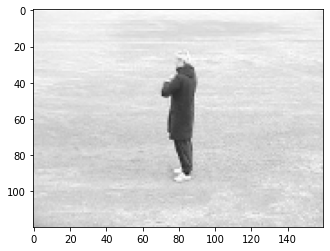

In [7]:
videodata = skvideo.io.vread(dataset[0][0])
videodata = videodata.astype(np.float32) / 255.
print('videodata shape:', videodata.shape)
plt.imshow(videodata[50, ...])

## Визуализация "движения"

motion shape: (407, 120, 160, 1)


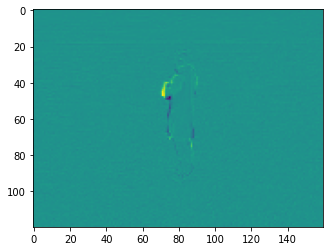

In [8]:
motion = np.mean(videodata[1:, ...] - videodata[:-1, ...], axis=3, keepdims=True)
print('motion shape:', motion.shape)
plt.imshow(motion[50, ..., 0])

## Создание модели CNN

In [9]:
WEIGHT_DECAY = 0.001

def get_model():

    wd = tf.keras.regularizers.l2(WEIGHT_DECAY)
    
    model = tf.keras.Sequential([
        tf.keras.layers.Conv3D(32, (5, 5, 5), (1, 2, 2), padding='same', activation="relu",kernel_regularizer=wd),
        tf.keras.layers.MaxPool3D((1, 2, 2), padding='same'),
        tf.keras.layers.BatchNormalization(),

        tf.keras.layers.Conv3D(64, (5, 5, 5), (1, 1, 1), padding='same', activation="relu",kernel_regularizer=wd),
        tf.keras.layers.MaxPool3D((1, 2, 2), padding='same'),
        tf.keras.layers.BatchNormalization(),

        tf.keras.layers.Conv3D(128, (3, 3, 3), (1, 2, 2), padding='same', activation="relu",kernel_regularizer=wd),
        tf.keras.layers.MaxPool3D((1, 2, 2), padding='same'),
        tf.keras.layers.BatchNormalization(),

        tf.keras.layers.Conv3D(128, (3, 3, 3), (1, 1, 1), activation="relu",kernel_regularizer=wd)  ,  
        tf.keras.layers.BatchNormalization(),

        tf.keras.layers.GlobalAveragePooling3D(),
        tf.keras.layers.Dense(units=128, activation="relu"),
        tf.keras.layers.Dropout(0.3),

        tf.keras.layers.Dense(units=6, activation=None)
        ])
    
    return model


# Build model.
model = get_model()


In [10]:
inp = motion[None, ...]
out = model(inp)

print('Input shape:', inp.shape)
print('Output shape:', out.shape)

Input shape: (1, 407, 120, 160, 1)
Output shape: (1, 6)


## Подготовка к обучению

In [11]:
BATCH_SIZE=1
NUM_EPOCHS = 5
LEARNING_RATE = 0.001

model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
    optimizer=tf.keras.optimizers.Adam(LEARNING_RATE),
    metrics=['accuracy'])

writer = tf.summary.create_file_writer('logs/exp1')

## Цикл обучения модели

In [12]:
global_step = 0
for ep in range(NUM_EPOCHS):
    for iter, (fpath, label) in enumerate(dataset):
        videodata = skvideo.io.vread(fpath)
        videodata = videodata.astype(np.float32) / 255.
        motion = np.mean(videodata[1:, ...] - videodata[:-1, ...], axis=3, keepdims=True)
        x = motion[None, ...]
        y = np.array(label)[None, ...]

        ret_dict = model.train_on_batch(x=x, y=y,return_dict=True)
        loss_value=ret_dict['loss']        
        accurancy=ret_dict['accuracy']
        
        if iter % 10 == 0:
            print(f'[{ep}/{NUM_EPOCHS}][{iter}/{len(dataset)}] Loss = {loss_value}')
            print(f'[{ep}/{NUM_EPOCHS}][{iter}/{len(dataset)}] Accurancy = {accurancy}')

            with writer.as_default():
                tf.summary.scalar('loss', loss_value, global_step)
                tf.summary.scalar('accurancy', accurancy, global_step)

        global_step += 1

[0/5][0/300] Loss = 2.0497794151306152
[0/5][0/300] Accurancy = 0.0
[0/5][10/300] Loss = 1.8777204751968384
[0/5][10/300] Accurancy = 0.0
[0/5][20/300] Loss = 1.8004900217056274
[0/5][20/300] Accurancy = 0.0
[0/5][30/300] Loss = 1.6877986192703247
[0/5][30/300] Accurancy = 1.0
[0/5][40/300] Loss = 1.8495208024978638
[0/5][40/300] Accurancy = 0.0
[0/5][50/300] Loss = 1.8027257919311523
[0/5][50/300] Accurancy = 0.0
[0/5][60/300] Loss = 1.7933168411254883
[0/5][60/300] Accurancy = 0.0
[0/5][70/300] Loss = 1.8427284955978394
[0/5][70/300] Accurancy = 0.0
[0/5][80/300] Loss = 1.8108232021331787
[0/5][80/300] Accurancy = 0.0
[0/5][90/300] Loss = 1.6526097059249878
[0/5][90/300] Accurancy = 1.0
[0/5][100/300] Loss = 1.8325750827789307
[0/5][100/300] Accurancy = 0.0
[0/5][110/300] Loss = 1.8142825365066528
[0/5][110/300] Accurancy = 0.0
[0/5][120/300] Loss = 1.689632534980774
[0/5][120/300] Accurancy = 1.0
[0/5][130/300] Loss = 1.7915586233139038
[0/5][130/300] Accurancy = 0.0
[0/5][140/300] 

[3/5][260/300] Loss = 1.7745825052261353
[3/5][260/300] Accurancy = 0.0
[3/5][270/300] Loss = 1.7267760038375854
[3/5][270/300] Accurancy = 1.0
[3/5][280/300] Loss = 1.707594394683838
[3/5][280/300] Accurancy = 1.0
[3/5][290/300] Loss = 1.8032485246658325
[3/5][290/300] Accurancy = 0.0
[4/5][0/300] Loss = 1.7733502388000488
[4/5][0/300] Accurancy = 1.0
[4/5][10/300] Loss = 1.788192629814148
[4/5][10/300] Accurancy = 0.0
[4/5][20/300] Loss = 1.766959309577942
[4/5][20/300] Accurancy = 0.0
[4/5][30/300] Loss = 1.7369266748428345
[4/5][30/300] Accurancy = 0.0
[4/5][40/300] Loss = 1.86448073387146
[4/5][40/300] Accurancy = 0.0
[4/5][50/300] Loss = 1.7865763902664185
[4/5][50/300] Accurancy = 0.0
[4/5][60/300] Loss = 1.7897138595581055
[4/5][60/300] Accurancy = 0.0
[4/5][70/300] Loss = 1.8132556676864624
[4/5][70/300] Accurancy = 0.0
[4/5][80/300] Loss = 1.8232672214508057
[4/5][80/300] Accurancy = 0.0
[4/5][90/300] Loss = 1.6875946521759033
[4/5][90/300] Accurancy = 1.0
[4/5][100/300] Loss

## TensorBoard

In [15]:
%load_ext tensorboard
%tensorboard --logdir logs

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 19312), started 4 days, 17:31:32 ago. (Use '!kill 19312' to kill it.)

## Тестирование обученной модели

True class: jogging
Predicted class: jogging


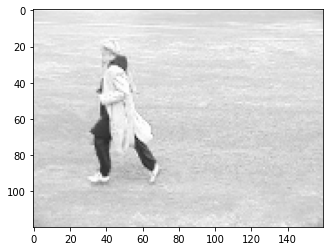

In [21]:
fpath, cls_true = random.choice(dataset)

videodata = skvideo.io.vread(fpath)
videodata = videodata.astype(np.float32) / 255.
plt.imshow(videodata[30, ...])

motion = np.mean(videodata[1:, ...] - videodata[:-1, ...], axis=3, keepdims=True)

out = model(motion[None, ...])[0]
cls_pred = np.argmax(out.numpy())

print('True class:', classes[cls_true])
print('Predicted class:', classes[cls_pred])